Visualise patches and labels

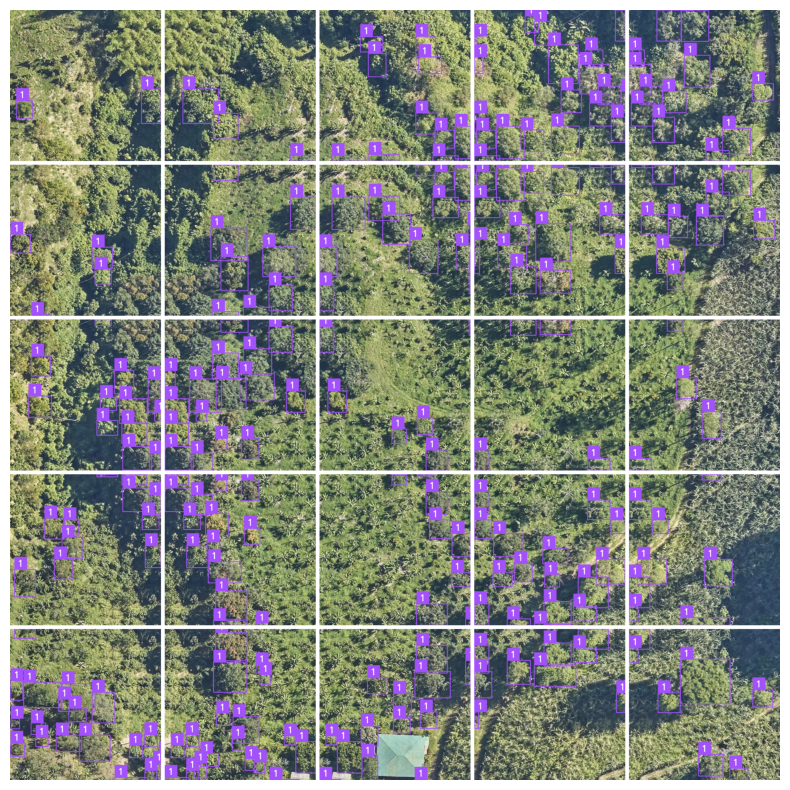

In [6]:
import supervision as sv

GRID_SIZE = 5

ds_train = sv.DetectionDataset.from_coco(
    images_directory_path="data/tiles/coco/train",
    annotations_path="data/tiles/coco/train/_annotations.coco.json",
)


def annotate(image, annotations, classes):
    labels = [classes[class_id] for class_id in annotations.class_id]

    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_scale=1, text_thickness=2)

    annotated_image = image.copy()
    annotated_image = bounding_box_annotator.annotate(annotated_image, annotations)
    annotated_image = label_annotator.annotate(
        annotated_image, annotations, labels=labels
    )
    return annotated_image


annotated_images = []
for i in range(25):
    _, image, annotations = ds_train[i]
    annotated_image = annotate(image, annotations, ds_train.classes)
    annotated_images.append(annotated_image)

grid = sv.create_tiles(
    annotated_images,
    grid_size=(GRID_SIZE, GRID_SIZE),
    single_tile_size=(400, 400),
    tile_padding_color=sv.Color.WHITE,
    tile_margin_color=sv.Color.WHITE,
)
sv.plot_image(grid, size=(10, 10))